**Evolução no tempo de indicadores das Demonstrações financeiras da Klabin**

**Início e entrada de dados**

In [11]:
#Código Jupyter Notebook para avaliar Klabin

import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive/')

#Observe que o arquivo Excel deve estar no endereço abaixo e com o mesmo nome. Caso você mude o endereço e o nome do arquivo
#as linhas de código devem ser modificadas

df_bp=pd.read_excel('/content/drive/My Drive/Colab Notebooks/Planilha de Resultados 2T24.xlsx', sheet_name= '3. Balanço Patrimonial', skiprows=1)
df_dre=pd.read_excel('/content/drive/My Drive/Colab Notebooks/Planilha de Resultados 2T24.xlsx', sheet_name= '4. DRE', skiprows=1)

df_bp.set_index('Balanço Patrimonial (R$ milhões)', inplace=True)
df_dre.set_index('DRE (R$ milhões)', inplace=True)



Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


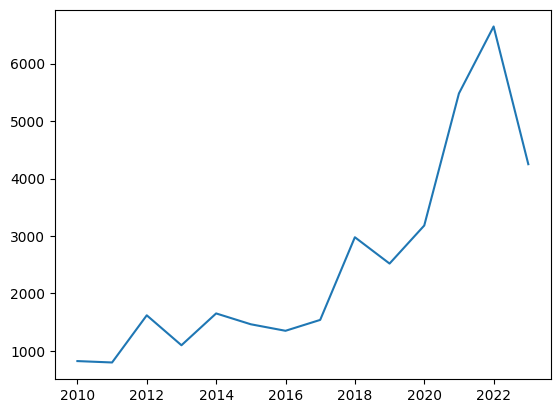

In [21]:
#Contas DRE

x=df_dre.columns
x=x[1:len(x)]
z=(x.str.isnumeric()).isna()
xDatas=x[(x.str.isnumeric()).isna()]

df_rl=pd.DataFrame(df_dre.loc['Receita Líquida'][xDatas])
df_rl.columns = ['Valor']
df_rl.index.name = 'Data'
dt={'Data':df_rl.index}

df_cpv=pd.DataFrame(df_dre.loc['Custo dos Produtos Vendidos'][xDatas]) * (-1)
df_cpv.columns = ['Valor']
df_cpv.index.name = 'Data'

df_ebit=pd.DataFrame(df_dre.loc['Resultado Oper. antes Desp. Fin. (EBIT)'][xDatas])
df_ebit.columns = ['Valor']
df_ebit.index.name = 'Data'

df_ebitda=pd.DataFrame(df_dre.loc['EBITDA'][xDatas])
df_ebitda.columns = ['Valor']
df_ebitda.index.name = 'Data'

df_dfin = pd.DataFrame(df_dre.loc['Despesas Financeiras'][xDatas]) * (-1)
df_dfin.columns = ['Valor']
df_dfin.index.name = 'Data'

df_lbr = pd.DataFrame(df_dre.loc['Lucro Bruto'][xDatas])
df_lbr.columns = ['Valor']
df_lbr.index.name = 'Data'

df_llq = pd.DataFrame(df_dre.loc['Resultado Líquido Controladora'][xDatas])
df_llq.columns = ['Valor']
df_llq.index.name = 'Data'

In [22]:
#Contas do balanço
x=df_bp.columns[df_bp.columns.str.contains('4T')]
df_ac=pd.DataFrame(df_bp.loc['Ativo Circulante'][x])
df_cx=pd.DataFrame(df_bp.loc['Caixa e equivalente de caixa'][x])

df_es=pd.DataFrame(df_bp.loc['Estoques'][x])
df_cr=pd.DataFrame(df_bp.loc['Contas a Receber'][x])
df_fr=pd.DataFrame(df_bp.loc['Fornecedores'][x])

df_pc=pd.DataFrame(df_bp.loc['Passivo Circulante'][x])
df_pnc=pd.DataFrame(df_bp.loc['Passivo Não Circulante'][x])
df_efin=pd.DataFrame(df_bp.loc['Empréstimos e Financiamentos'][x])
df_deb=pd.DataFrame(df_bp.loc['Debentures'][x])
df_ppl=pd.DataFrame(df_bp.loc['Passivo Total + Patrimônio Líquido'][x])

df_ac.columns = ['Valor']
df_ac['Data'] = dt['Data']
df_ac.set_index('Data', inplace=True )
df_pc.columns = ['Valor']
df_pc['Data'] = dt['Data']
df_pc.set_index('Data', inplace=True )
df_cx.columns = ['Valor']
df_cx['Data'] = dt['Data']
df_cx.set_index('Data', inplace=True )
df_es.columns = ['Valor']
df_es['Data'] = dt['Data']
df_es.set_index('Data', inplace=True )
df_cr.columns = ['Valor']
df_cr['Data'] = dt['Data']
df_cr.set_index('Data', inplace=True )
df_fr = pd.DataFrame(df_fr.sum(axis = 0) )
df_fr.columns = ['Valor']
df_fr['Data'] = dt['Data']
df_fr.set_index('Data', inplace=True )
df_pnc.columns = ['Valor']
df_pnc['Data'] = dt['Data']
df_pnc.set_index('Data', inplace=True )
df_efin = pd.DataFrame(df_efin.sum(axis = 0) )
df_efin.columns = ['Valor']
df_efin['Data'] = dt['Data']
df_efin.set_index('Data', inplace=True )
df_deb = pd.DataFrame(df_deb.sum(axis = 0) )
df_deb.columns = ['Valor']
df_deb['Data'] = dt['Data']
df_deb.set_index('Data', inplace=True )
df_ppl.columns = ['Valor']
df_ppl['Data'] = dt['Data']
df_ppl.set_index('Data', inplace=True )


**Índices de atividade, ciclo operacional e ciclo financeiro**

Giro de Contas a Receber, Giro de Contas a Pagar e Giro de Estoques
Giro de Contas a Receber aula de hj
         Valor
Data          
2010  4.858739
2011  4.736296
2012  4.240081
2013  4.016316
2014   4.26047
2015  3.788957
2016  4.362241
2017  4.773717
2018   4.90779
2019  5.523964
2020  6.612804
2021  5.868366
2022  7.489142
2023  8.531056


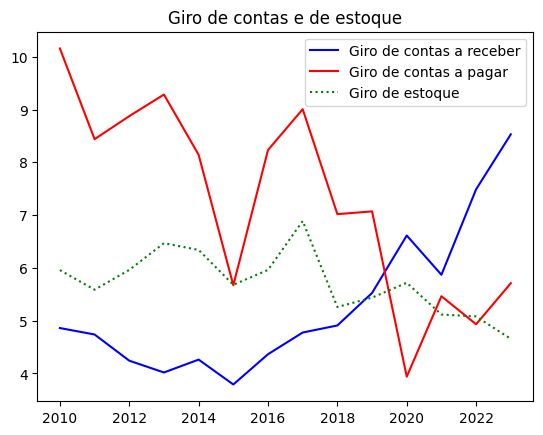

In [23]:
print('Giro de Contas a Receber, Giro de Contas a Pagar e Giro de Estoques')
gcr = df_rl/df_cr
gcp = df_cpv/df_fr
ges = df_cpv/df_es
plt.plot(gcr.index, gcr['Valor'], color = 'b', label = 'Giro de contas a receber')
plt.plot(gcp.index, gcp['Valor'], color = 'r', label = 'Giro de contas a pagar')
plt.plot(ges.index, ges['Valor'], color = 'g', label = 'Giro de estoque', linestyle='dotted')
plt.title('Giro de contas e de estoque')
plt.legend()
print('Giro de Contas a Receber aula de hj')
print(gcr)

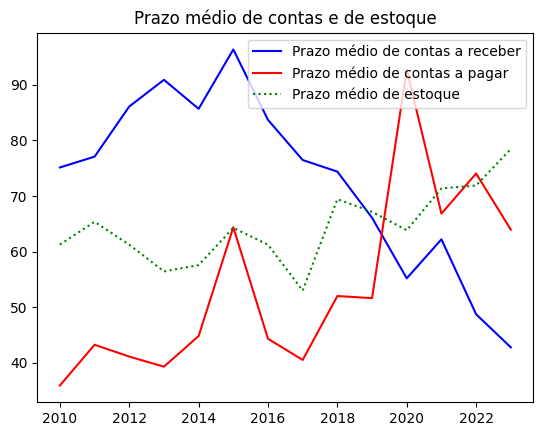

In [ ]:
pmcr = 365/gcr
pmcp = 365/gcp
pme = 365/ges

plt.plot(pmcr.index, pmcr['Valor'], color = 'b', label = 'Prazo médio de contas a receber')
plt.plot(pmcp.index, pmcp['Valor'], color = 'r', label = 'Prazo médio de contas a pagar')
plt.plot(pme.index, pme['Valor'], color = 'g', label = 'Prazo médio de estoque', linestyle='dotted')
plt.title('Prazo médio de contas e de estoque')
plt.legend()



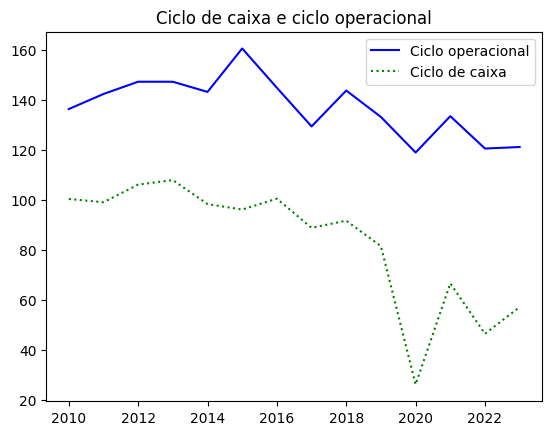

In [ ]:
#Ciclo operacional e ciclo de caixa
cl_op = pme + pmcr
cl_cx = cl_op - pmcp

plt.plot(cl_op.index, cl_op['Valor'], color = 'b', label = 'Ciclo operacional')
plt.plot(cl_cx.index, cl_cx['Valor'], color = 'g', label = 'Ciclo de caixa', linestyle='dotted')
plt.title("Ciclo de caixa e ciclo operacional")
plt.legend()

**Análise de liquidez**

Índices de liquidez


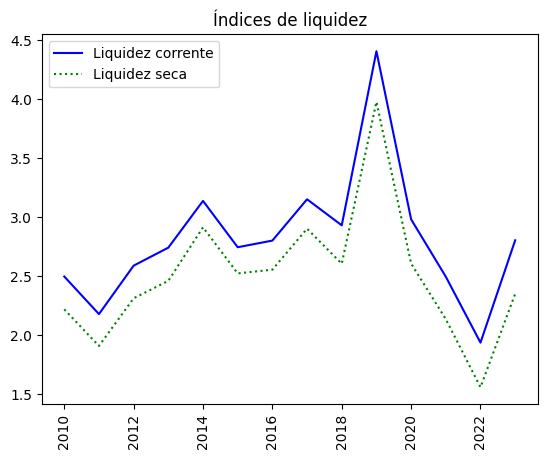

In [24]:
print('Índices de liquidez')
liqCorr = df_ac/df_pc
liqSeca = (df_ac-df_es)/df_pc

plt.plot(liqCorr.index, liqCorr['Valor'], color = 'b', label = 'Liquidez corrente')
plt.plot(liqSeca.index, liqSeca['Valor'], color = 'g', label = 'Liquidez seca', linestyle='dotted')
plt.xticks(rotation='vertical')
plt.title('Índices de liquidez')
plt.legend()

# **Alavancagem financeira**

Alavancagem financeira


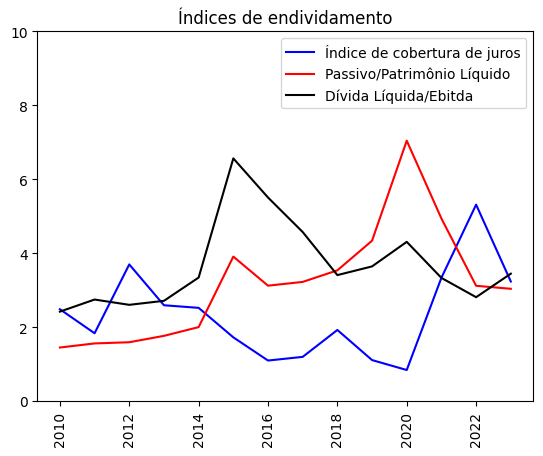

In [ ]:
print('Alavancagem financeira')
cobJur = df_ebit/df_dfin
r_ppl = (df_pc + df_pnc) / (df_ppl - (df_pc + df_pnc))
divliq = df_efin + df_deb - df_cx
divliq_ebitda = divliq / df_ebitda

plt.plot(cobJur.index, cobJur['Valor'], color = 'b', label = 'Índice de cobertura de juros')
plt.plot(r_ppl.index, r_ppl['Valor'], color = 'r', label = 'Passivo/Patrimônio Líquido')
plt.plot(divliq_ebitda.index, divliq_ebitda['Valor'], color = 'k', label = 'Dívida Líquida/Ebitda')

plt.ylim(0,10)
plt.xticks(rotation='vertical')
plt.title('Índices de endividamento')
plt.legend()

**Rentabilidade**

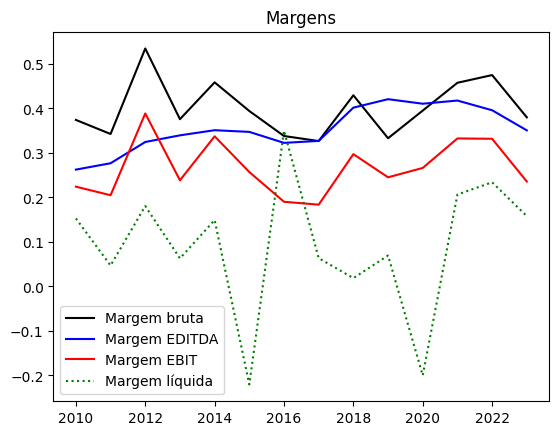

In [ ]:
mbr = df_lbr / df_rl
mebitda = df_ebitda / df_rl
mebit = df_ebit / df_rl
mlq = df_llq / df_rl

plt.plot(mbr.index, mbr['Valor'], color = 'k', label = 'Margem bruta')
plt.plot(mebitda.index, mebitda['Valor'], color = 'b', label = 'Margem EDITDA')
plt.plot(mebit.index, mebit['Valor'], color = 'r', label = 'Margem EBIT')
plt.plot(mlq.index, mlq['Valor'], color = 'g', label = 'Margem líquida', linestyle='dotted')
plt.title('Margens')
plt.legend()
